In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#data = data[0:5000]

In [5]:
data["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [6]:
positive_data = data[data["diabetes"]==1]

In [7]:
positive_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [8]:
negative_data = data[data["diabetes"]==0][0:8500]

new_data = pd.concat([positive_data, negative_data], ignore_index=True, sort=False)

new_data["diabetes"].value_counts()

1    8500
0    8500
Name: diabetes, dtype: int64

In [9]:
new_data = new_data.sample(frac=1)

In [10]:
new_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9874,Female,24.0,0,0,never,25.20,3.5,155,0
16636,Female,45.0,0,0,former,24.75,5.0,130,0
991,Female,47.0,1,0,never,59.59,6.6,160,1
327,Male,43.0,0,0,current,49.38,6.0,160,1
12899,Female,39.0,0,0,never,52.89,5.8,159,0
...,...,...,...,...,...,...,...,...,...
12596,Male,39.0,0,0,No Info,27.32,6.0,90,0
10440,Female,70.0,0,0,never,35.72,6.2,140,0
1281,Male,43.0,0,0,No Info,28.08,6.1,220,1
7820,Female,63.0,1,0,not current,38.15,6.2,240,1


In [11]:
new_data["bmi"].unique()

array([25.2 , 24.75, 59.59, ..., 20.42, 42.25, 40.64])

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

from pandas.core.dtypes.common import is_numeric_dtype

for column in new_data.columns:
    if is_numeric_dtype(new_data[column]):
        continue
    else:
        new_data[column]=label.fit_transform(new_data[column])

In [13]:
new_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9874,0,24.0,0,0,4,25.20,3.5,155,0
16636,0,45.0,0,0,3,24.75,5.0,130,0
991,0,47.0,1,0,4,59.59,6.6,160,1
327,1,43.0,0,0,1,49.38,6.0,160,1
12899,0,39.0,0,0,4,52.89,5.8,159,0


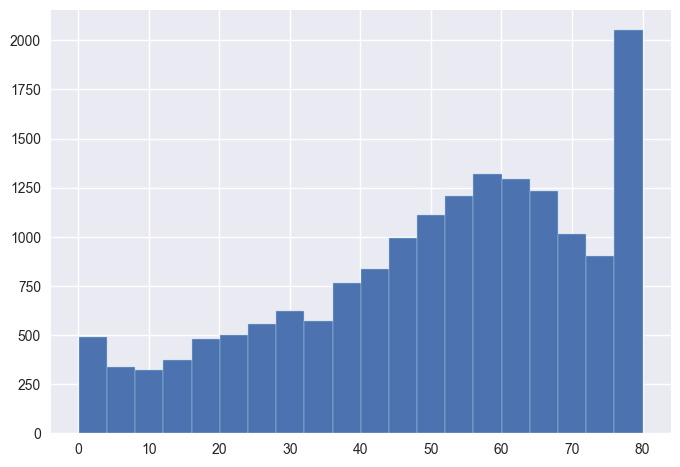

In [14]:
plt.hist(new_data["age"], bins=20, edgecolor="lightblue");

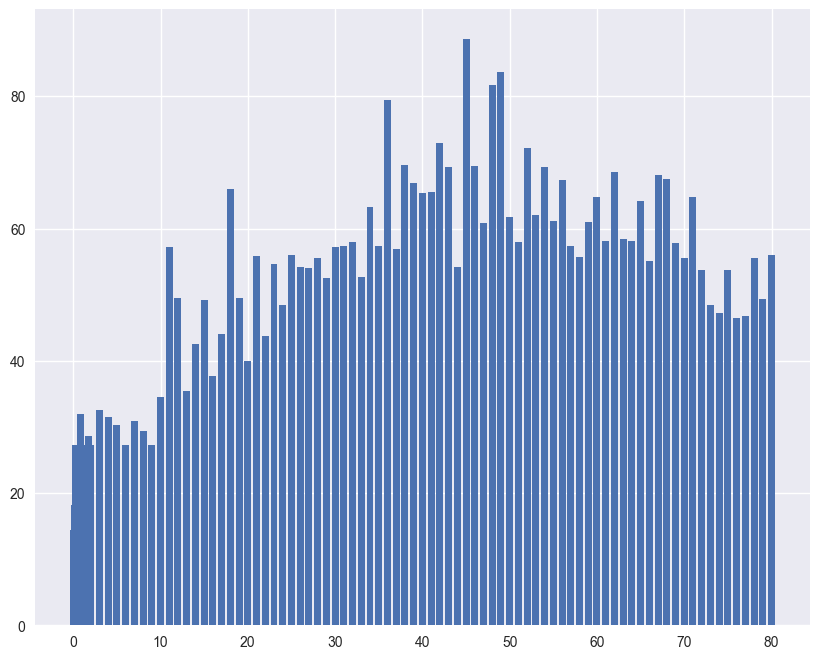

In [15]:
plt.figure(figsize=(10, 8))
plt.bar(new_data["age"], new_data["bmi"]);

In [16]:
new_data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.007534,0.013465,0.088217,-0.062450,-0.036759,0.040191,0.038098,0.060602
age,0.007534,1.000000,0.249317,0.253380,0.233549,0.254934,0.292719,0.262478,0.478389
hypertension,0.013465,0.249317,1.000000,0.099651,0.115350,0.149473,0.156885,0.138930,0.257158
heart_disease,0.088217,0.253380,0.099651,1.000000,0.028768,0.050613,0.131763,0.120274,0.213898
smoking_history,-0.062450,0.233549,0.115350,0.028768,1.000000,0.174006,0.107943,0.088429,0.178063
bmi,-0.036759,0.254934,0.149473,0.050613,0.174006,1.000000,0.196759,0.184628,0.342199
HbA1c_level,0.040191,0.292719,0.156885,0.131763,0.107943,0.196759,1.000000,0.317281,0.603385
blood_glucose_level,0.038098,0.262478,0.138930,0.120274,0.088429,0.184628,0.317281,1.000000,0.538352
diabetes,0.060602,0.478389,0.257158,0.213898,0.178063,0.342199,0.603385,0.538352,1.000000


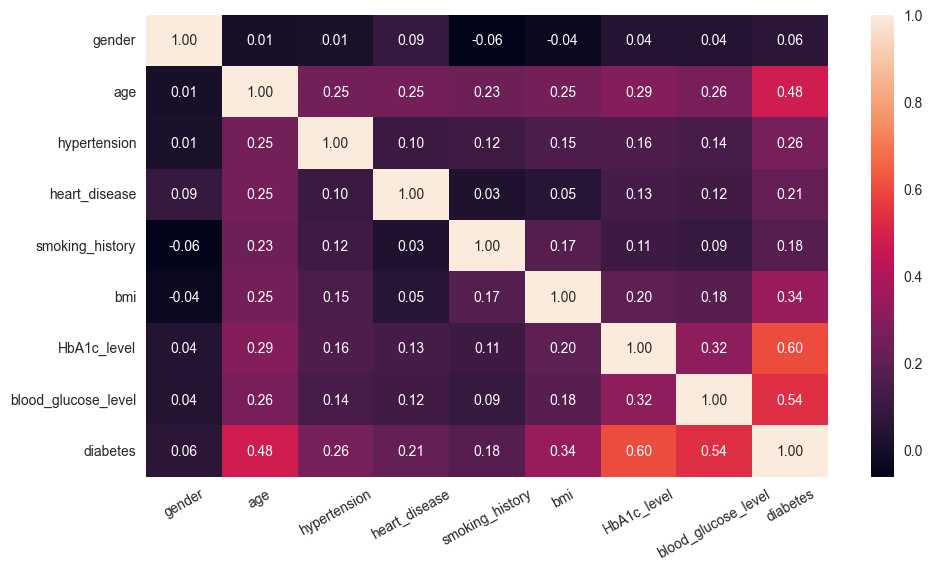

In [17]:
plt.figure(figsize=(11, 6))

sns.heatmap(new_data.corr(),
            fmt=".2f",
            annot=True)

plt.xticks(rotation=29);

In [18]:
new_data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12596,1,39.0,0,0,0,27.32,6.0,90,0
10440,0,70.0,0,0,4,35.72,6.2,140,0
1281,1,43.0,0,0,0,28.08,6.1,220,1
7820,0,63.0,1,0,5,38.15,6.2,240,1
5377,1,27.0,0,0,4,27.32,6.6,160,1


In [19]:
new_data.dtypes

gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

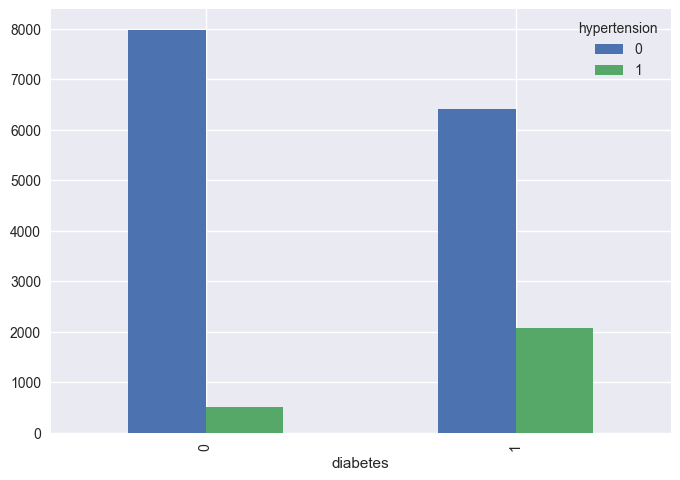

In [20]:
pd.crosstab(new_data["diabetes"], new_data["hypertension"]).plot(kind="bar");

In [21]:
new_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9874,0,24.0,0,0,4,25.20,3.5,155,0
16636,0,45.0,0,0,3,24.75,5.0,130,0
991,0,47.0,1,0,4,59.59,6.6,160,1
327,1,43.0,0,0,1,49.38,6.0,160,1
12899,0,39.0,0,0,4,52.89,5.8,159,0


In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [88]:
norm_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rob_scaler = RobustScaler(unit_variance=True)

new_data_norm = norm_scaler.fit_transform(new_data)
new_data_std = std_scaler.fit_transform(new_data)
new_data_rob = rob_scaler.fit_transform(new_data)

In [89]:
new_data_std

array([[-0.8955405 , -1.24365584, -0.42511121, ..., -2.06492275,
        -0.1463939 , -1.        ],
       [-0.8955405 , -0.26486601, -0.42511121, ..., -0.89970671,
        -0.58427022, -1.        ],
       [-0.8955405 , -0.17164793,  2.35232562, ...,  0.34319039,
        -0.05881864,  1.        ],
       ...,
       [ 1.11664408, -0.35808409, -0.42511121, ..., -0.04521495,
         0.99208453,  1.        ],
       [-0.8955405 ,  0.5740967 ,  2.35232562, ...,  0.03246612,
         1.34238558,  1.        ],
       [ 1.11664408, -1.10382872, -0.42511121, ...,  0.34319039,
        -0.05881864,  1.        ]])

In [90]:
norm_data = pd.DataFrame(new_data_norm, columns=["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "bloos_glucose_level", "diabetes"])

std_data = pd.DataFrame(new_data_std, columns=["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "bloos_glucose_level", "diabetes"])

rob_data = pd.DataFrame(new_data_rob, columns=["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "bloos_glucose_level", "diabetes"])

In [91]:
std_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,bloos_glucose_level,diabetes
0,-0.895541,-1.243656,-0.425111,-0.311313,0.863682,-0.575855,-2.064923,-0.146394,-1.0
1,-0.895541,-0.264866,-0.425111,-0.311313,0.308868,-0.636713,-0.899707,-0.584270,-1.0
2,-0.895541,-0.171648,2.352326,-0.311313,0.863682,4.075016,0.343190,-0.058819,1.0
3,1.116644,-0.358084,-0.425111,-0.311313,-0.800760,2.694225,-0.122896,-0.058819,1.0
4,-0.895541,-0.544520,-0.425111,-0.311313,0.863682,3.168914,-0.278258,-0.076334,-1.0
...,...,...,...,...,...,...,...,...,...
16995,1.116644,-0.544520,-0.425111,-0.311313,-1.355574,-0.289148,-0.122896,-1.284872,-1.0
16996,-0.895541,0.900360,-0.425111,-0.311313,0.863682,0.846860,0.032466,-0.409120,-1.0
16997,1.116644,-0.358084,-0.425111,-0.311313,-1.355574,-0.186367,-0.045215,0.992085,1.0
16998,-0.895541,0.574097,2.352326,-0.311313,1.418496,1.175490,0.032466,1.342386,1.0


In [92]:
std_data.describe().round(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,bloos_glucose_level,diabetes
count,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.000,17000.0
mean,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.0
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0
min,-0.896,-2.359,-0.425,-0.311,-1.356,-2.630,-2.065,-1.460,-1.0
25%,-0.896,-0.684,-0.425,-0.311,-1.356,-0.495,-0.356,-0.584,-1.0
50%,-0.896,0.155,-0.425,-0.311,0.309,-0.289,-0.045,-0.146,0.0
75%,1.117,0.761,-0.425,-0.311,0.864,0.458,0.343,0.642,1.0
max,1.117,1.366,2.352,3.212,1.418,8.015,2.208,2.393,1.0


In [29]:
# X = new_data.drop("diabetes", axis=1)
# y = new_data["diabetes"]

X = std_data.drop("diabetes", axis=1)
y = std_data["diabetes"]

In [30]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,bloos_glucose_level
0,-0.895541,-1.243656,-0.425111,-0.311313,0.863682,-0.575855,-2.064923,-0.146394
1,-0.895541,-0.264866,-0.425111,-0.311313,0.308868,-0.636713,-0.899707,-0.584270
2,-0.895541,-0.171648,2.352326,-0.311313,0.863682,4.075016,0.343190,-0.058819
3,1.116644,-0.358084,-0.425111,-0.311313,-0.800760,2.694225,-0.122896,-0.058819
4,-0.895541,-0.544520,-0.425111,-0.311313,0.863682,3.168914,-0.278258,-0.076334


In [31]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA()

pca.n_components = 8

pca_data = pca.fit_transform(X)

In [71]:
pca.explained_variance_ratio_

array([0.26089209, 0.141447  , 0.11810759, 0.11114753, 0.10787939,
       0.09897066, 0.08523744, 0.07631831])

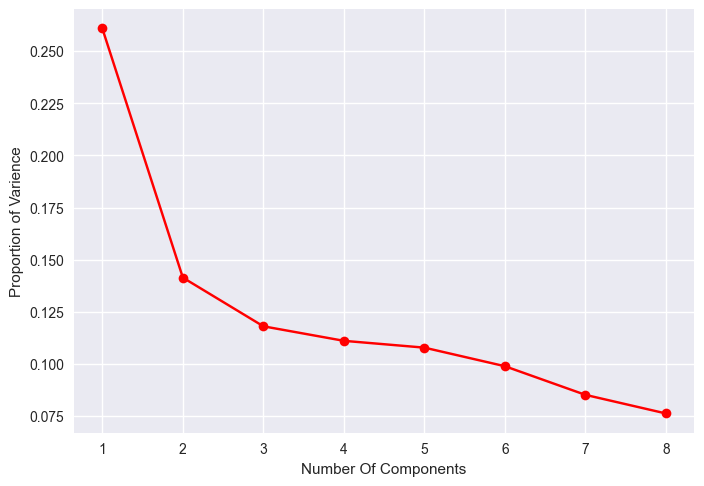

In [73]:
pca_numbering = np.arange(pca.n_components) + 1

plt.plot(pca_numbering, pca.explained_variance_ratio_, "ro-")

plt.xlabel("Number Of Components")

plt.ylabel("Proportion of Varience");

In [69]:
pca.components_

array([[ 0.03107111,  0.50038531,  0.33423383,  0.27126375,  0.28269023,
         0.36673103,  0.42972662,  0.40531774],
       [ 0.67816802, -0.00238928, -0.03890875,  0.45432572, -0.45933492,
        -0.29562736,  0.12229068,  0.13717711],
       [ 0.01679463,  0.21716965,  0.31537496,  0.51359234,  0.34312944,
        -0.16300808, -0.4260308 , -0.51332751],
       [-0.70277755,  0.09715113, -0.26906077,  0.50254472, -0.31856992,
        -0.21026996,  0.09762161,  0.1284144 ],
       [-0.20296537, -0.06367795,  0.81488088, -0.1841915 , -0.49811308,
        -0.0916283 , -0.01354662, -0.00984517],
       [ 0.0397308 , -0.00133643, -0.11665733,  0.17984951, -0.41338388,
         0.82029065, -0.22426402, -0.24167658],
       [ 0.00601357, -0.06620151,  0.04770673,  0.06173631,  0.06138393,
         0.03096504, -0.71514513,  0.6879931 ],
       [-0.04620325, -0.82738656,  0.18709112,  0.36550254,  0.25904091,
         0.15841845,  0.21780123,  0.07117285]])

Text(0, 0.5, 'pc2')

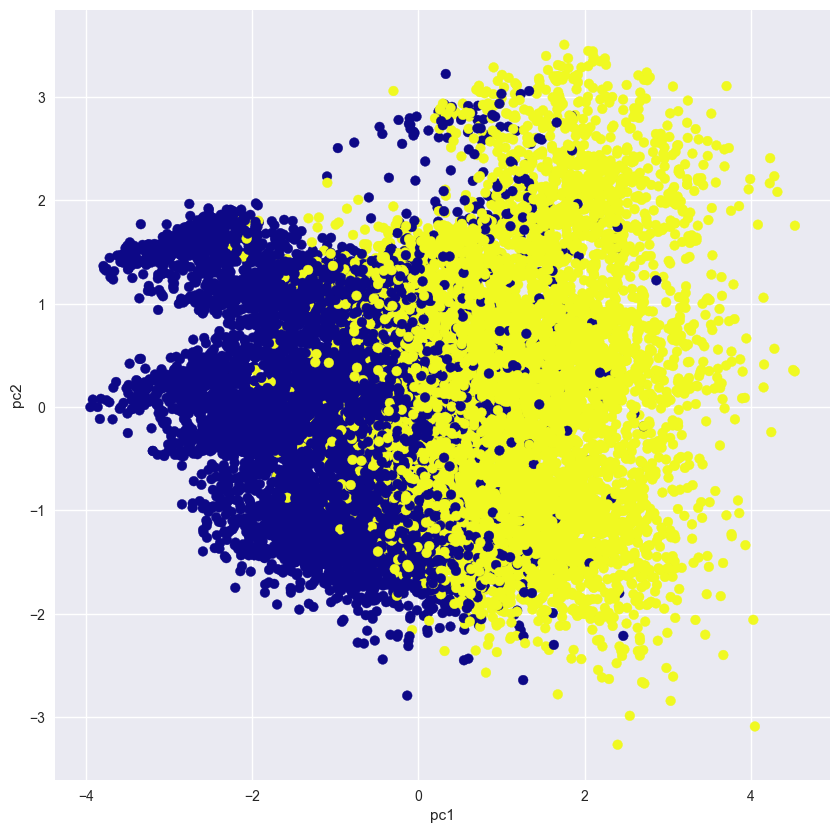

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [83]:
pca_data

array([[-1.79038481, -1.22833592,  0.76601063, ..., -0.37124879,
         1.44863281,  0.54938176],
       [-1.1565263 , -0.87540946,  0.52647737, ..., -0.34861818,
         0.21333986, -0.1911957 ],
       [ 2.4502904 , -2.40738549,  0.04573754, ...,  2.55715818,
        -0.00771812,  1.44955735],
       ...,
       [-0.43989368,  1.44155039, -1.27772803, ...,  0.21632048,
         0.61682201, -0.26855021],
       [ 2.3513511 , -1.65261925,  0.28381115, ..., -0.32059708,
         1.07341702,  0.54897105],
       [-0.48242616,  0.35767396, -0.28744995, ..., -0.61752507,
        -0.20154487,  0.91686384]])

Text(0.5, 0, 'PC3')

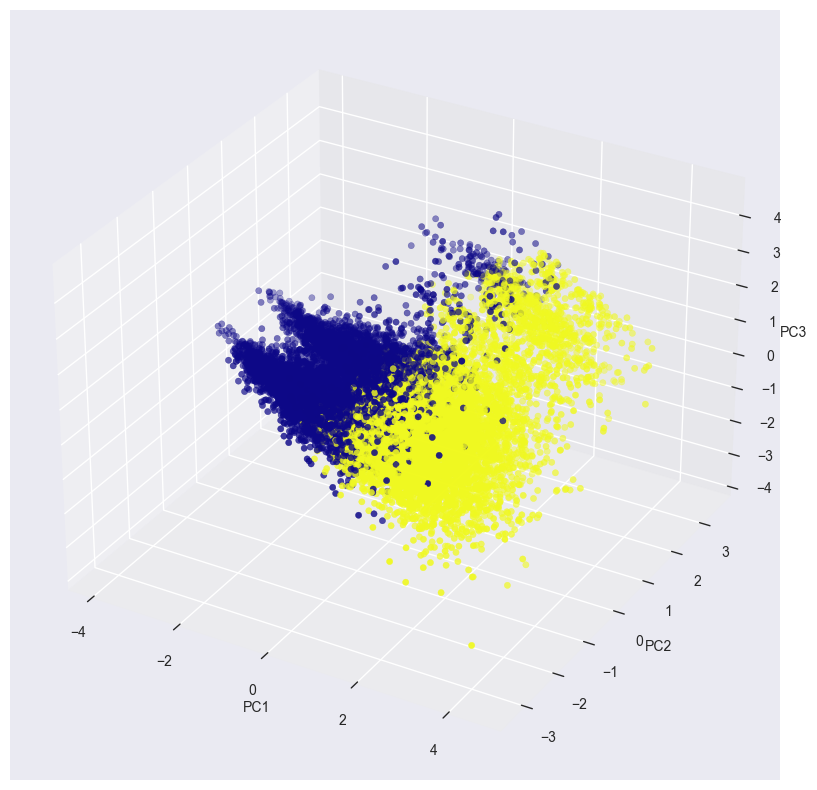

In [79]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=y, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [47]:
# cat_features = ["gender", "smoking_history"]

# transformer = ColumnTransformer([("one_hot", OneHotEncoder(handle_unknown="ignore"), cat_features)], remainder="passthrough")

# transformed_X = transformer.fit_transform(data)

# transformed_X = pd.DataFrame(transformed_X)

In [48]:
# transformed_X.head()

In [49]:
# transformer = ColumnTransformer([("one_hot", OneHotEncoder(handle_unknown="ignore").inverse_transform(transformed_X), cat_features)], remainder="passthrough")

# orig_data = transformer.fit_transform()

In [138]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [139]:
# Creating a model dictionary with different models
model_dict = {"Logistic Regression": LogisticRegression(max_iter=1000),
              "Random Forest Classifier": RandomForestClassifier(),
              "K-Neighbors Classifier": KNeighborsClassifier(),
              "Naive Bayes": GaussianNB(),
              "Linear SVC": LinearSVC(max_iter=1500),
              "Gradient Boosting Classifier": GradientBoostingClassifier(),
              "Hist Grad. Boosting Classifier": HistGradientBoostingClassifier()}


# Definig a Function to fit and evaluate different models
def fit_and_evaluate(model_dict, X_train, X_test, y_train, y_test):
    score_dict = {}
    trained_models = []
    
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        score_dict[name] = model.score(X_test, y_test)
        trained_models.append(model)
    return score_dict, trained_models

In [140]:
scores, models = fit_and_evaluate(model_dict, X_train, X_test, y_train, y_test)

In [141]:
scores

{'Logistic Regression': 0.8770588235294118,
 'Random Forest Classifier': 0.9011764705882352,
 'K-Neighbors Classifier': 0.8844117647058823,
 'Naive Bayes': 0.8358823529411765,
 'Linear SVC': 0.8779411764705882,
 'Gradient Boosting Classifier': 0.9085294117647059,
 'Hist Grad. Boosting Classifier': 0.9102941176470588}

In [142]:
models[5].score(X_test, y_test)

0.9085294117647059

In [36]:
gb_reg_pred = models[5].predict(X_test)

In [37]:
print(classification_report(y_test, gb_reg_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1700
           1       0.91      0.93      0.92      1700

    accuracy                           0.92      3400
   macro avg       0.92      0.92      0.92      3400
weighted avg       0.92      0.92      0.92      3400



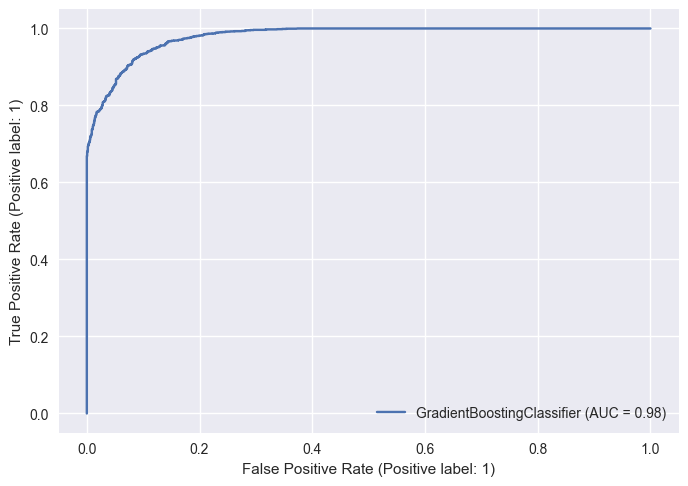

In [38]:
RocCurveDisplay.from_estimator(models[5], X_test, y_test);

In [88]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [89]:
model.score(X_test, y_test)

0.8864705882352941

In [90]:
y_pred = model.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1700
         1.0       0.89      0.88      0.89      1700

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



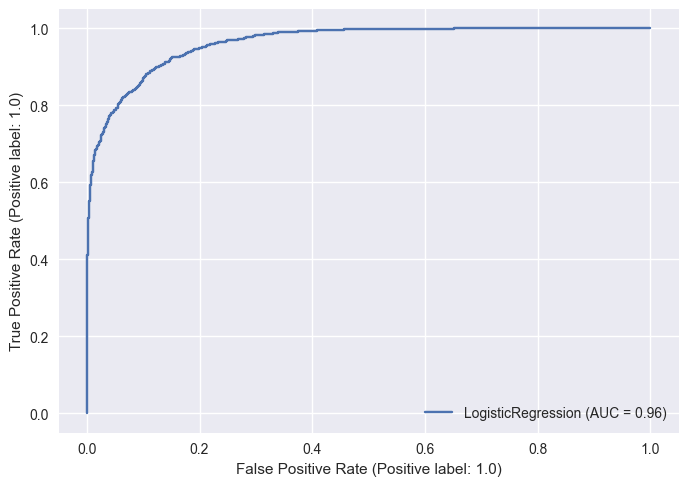

In [92]:
RocCurveDisplay.from_estimator(model, X_test, y_test);

In [44]:
np.mean(cross_val_score(model, X, y, cv=5))

0.8842941176470589

In [45]:
# Random Forest Classifier

model_2 = RandomForestClassifier()

model_2.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
model_2.score(X_test, y_test)

0.9044117647058824

In [47]:
y_pred_2 = model_2.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1700
           1       0.90      0.91      0.91      1700

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



In [49]:
np.mean(cross_val_score(model_2, X, y, cv=5))

0.9027647058823529

In [56]:
# Feature Importance

coef_dict = dict(zip(new_data.columns, model.coef_[0]))

In [57]:
coef_df = pd.DataFrame(coef_dict, index=[0])

In [58]:
coef_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.266528,0.047982,0.842568,0.800191,0.109657,0.095462,2.184984,0.031531


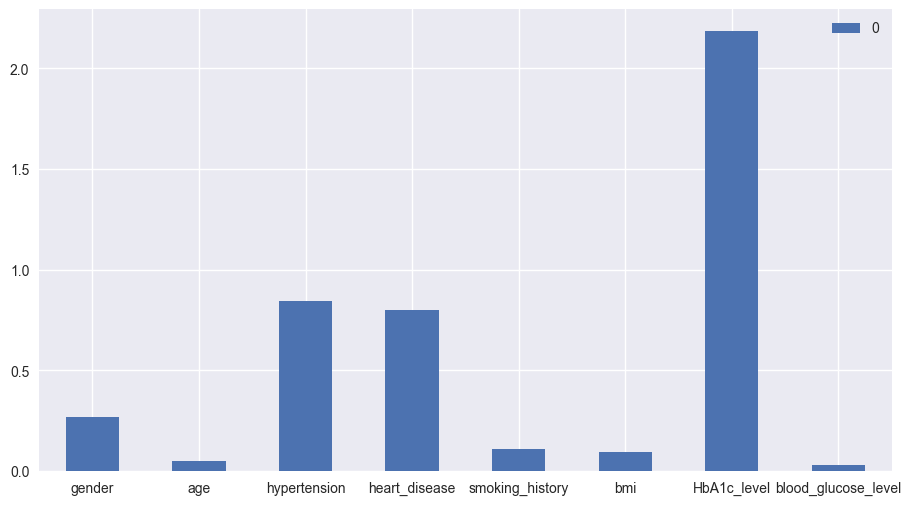

In [59]:
coef_df.T.plot.bar(figsize=(11,6))
plt.xticks(rotation=0);

In [60]:
gradient_boost = GradientBoostingClassifier()

In [61]:
learning_rate = [0.01, 0.1]
n_estimators = [100, 300, 500]
max_depth = [3, 5]
min_samples_leaf = [4, 6, 20] 
min_samples_split = [150]
max_features = ['sqrt', 'log2', None]


hyperparameter_grid = {'learning_rate': learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gradient_boost,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=10,
                               verbose = 2, 
                               return_train_score = True,
                               random_state=42)

random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_samples_leaf=6, min_samples_split=150, n_estimators=500; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_samples_leaf=6, min_samples_split=150, n_estimators=500; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_samples_leaf=6, min_samples_split=150, n_estimators=500; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=None, min_samples_leaf=6, min_samples_split=150, n_estimators=500; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=150, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=150, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_spli

RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [4, 6, 20],
                                        'min_samples_split': [150],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, return_train_score=True, verbose=2)

In [62]:
random_cv.score(X_test, y_test)

0.9155882352941176

In [63]:
random_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 150,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 3,
 'learning_rate': 0.1}

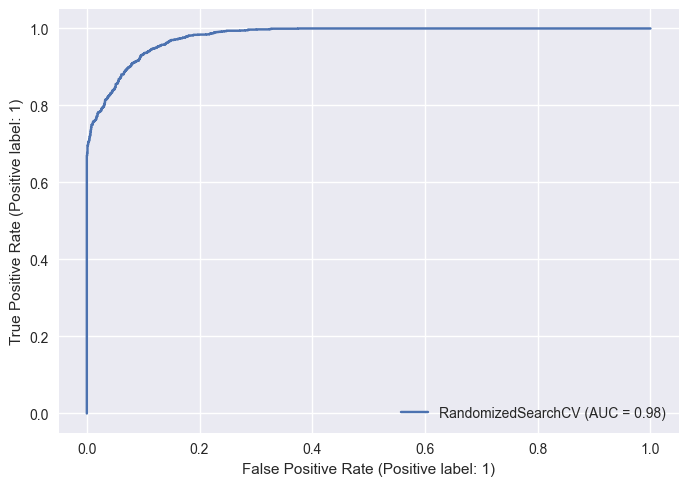

In [64]:
RocCurveDisplay.from_estimator(random_cv, X_test, y_test);

In [65]:
random_cv_pred = random_cv.predict(X_test)

In [66]:
print(classification_report(y_test, random_cv_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1700
           1       0.91      0.93      0.92      1700

    accuracy                           0.92      3400
   macro avg       0.92      0.92      0.92      3400
weighted avg       0.92      0.92      0.92      3400

